<a href="https://colab.research.google.com/github/elaine-zhang12/assignment2_ez/blob/main/Analysis_of_Improving_Pedestrian_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4VA - Analysis of Improving Pedestrian Safety
Cheryl Bai, Eric Xie, Elaine Zhang

## Getting the Data

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(42)

crash_data = pd.DataFrame()
# read the dataset
for i in range(6):
  df = pd.read_csv("Crash_2020_2023_" + str(i) + ".csv")
  df_ped = df.loc[df["PED_NONPED"] == "Yes"]
  crash_data = pd.concat([crash_data, df_ped], ignore_index=True)

crash_data = crash_data.reset_index(drop=True)
crash_data

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,...,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET
0,-76.589129,37.213034,641773,203305319,2020,2020/10/22 03:59:59+00,1135,A,0,1,...,Urban,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA SR00143NB,27.07,646123.0,190.0
1,-76.709165,37.333128,641816,202645276,2020,2020/09/19 03:59:59+00,1330,A,0,1,...,Rural,VDOT Interstate,5,1. State Hwy Agency,Hampton Roads,HAMP,R-VA IS00064WB,236.33,NaN,NaN
2,-77.379622,37.214527,641989,203605036,2020,2020/12/22 05:00:00+00,1837,B,0,0,...,Urban,VDOT Interstate,1,1. State Hwy Agency,Crater,TCAT,R-VA IS00095NB DCR050.00X,0.31,709761.0,623.0
3,-77.221516,37.643252,641994,202605140,2020,2020/09/15 03:59:59+00,640,B,0,0,...,Rural,VDOT Secondary,1,1. State Hwy Agency,Richmond Regional,RICH,R-VA042SC00628NB,7.54,374391.0,554.0
4,-76.350701,36.822881,642032,202745098,2020,2020/09/29 03:59:59+00,1053,A,0,1,...,Urban,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA US00058EB,485.78,483072.0,1146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,-78.489160,38.056671,1048299,232425285,2023,2023/08/22 03:59:59+00,1913,B,0,0,...,Urban,NonVDOT primary,3,3. City or Town Hwy Agency,Thomas Jefferson,CVIL,R-VA US00250EB,95.64,111429.0,375.0
4898,-77.444396,37.551889,1048339,230765253,2023,2023/03/17 03:59:59+00,1727,A,0,1,...,Urban,NonVDOT primary,1,3. City or Town Hwy Agency,Richmond Regional,RICH,R-VA US00001NB,93.84,209567.0,48.0
4899,-77.404846,38.899678,1048473,232245088,2023,2023/07/09 03:59:59+00,2240,A,0,1,...,Urban,VDOT Primary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA SR00286SB,23.21,NaN,NaN
4900,-76.963614,38.254560,1048521,231675202,2023,2023/06/16 03:59:59+00,1200,C,0,0,...,Rural,NonVDOT secondary,1,3. City or Town Hwy Agency,Northern Neck,NaN,S-VA199NP WASHINGTON AVE,0.30,NaN,NaN


In [2]:
# select relevant columns for analysis
cols = ["X", "Y", "CRASH_YEAR", "CRASH_MILITARY_TM", "CRASH_SEVERITY", "PEDESTRIANS_KILLED", "PEDESTRIANS_INJURED", "WEATHER_CONDITION", "LIGHT_CONDITION",
        "ROADWAY_SURFACE_COND", "RELATION_TO_ROADWAY", "ROADWAY_ALIGNMENT", "ROADWAY_SURFACE_TYPE", "ROADWAY_DEFECT", "ROADWAY_DESCRIPTION", "INTERSECTION_TYPE",
        "TRAFFIC_CONTROL_TYPE", "TRFC_CTRL_STATUS_TYPE", "SCHOOL_ZONE", "FIRST_HARMFUL_EVENT", "FIRST_HARMFUL_EVENT_LOC", "ALCOHOL_NOTALCOHOL", "DISTRACTED_NOTDISTRACTED",
        "DROWSY_NOTDROWSY", "DRUG_NODRUG", "SPEED_NOTSPEED", "INTERSECTION_ANALYSIS", "SENIOR_NOTSENIOR", "YOUNG_NOTYOUNG", "MAINLINE_YN", "NIGHT", "AREA_TYPE"]

crash_data = crash_data[cols]

In [3]:
# quick summary of the dataset
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X                         4902 non-null   float64
 1   Y                         4902 non-null   float64
 2   CRASH_YEAR                4902 non-null   int64  
 3   CRASH_MILITARY_TM         4902 non-null   int64  
 4   CRASH_SEVERITY            4902 non-null   object 
 5   PEDESTRIANS_KILLED        4902 non-null   int64  
 6   PEDESTRIANS_INJURED       4902 non-null   int64  
 7   WEATHER_CONDITION         4902 non-null   object 
 8   LIGHT_CONDITION           4902 non-null   object 
 9   ROADWAY_SURFACE_COND      4902 non-null   object 
 10  RELATION_TO_ROADWAY       4902 non-null   object 
 11  ROADWAY_ALIGNMENT         4902 non-null   object 
 12  ROADWAY_SURFACE_TYPE      4902 non-null   object 
 13  ROADWAY_DEFECT            4902 non-null   object 
 14  ROADWAY_

In [4]:
# information about number of entires and features
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[0]) + " entries.")
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[1]) + " features.")

The selected pedestrian related crash dataset has 4902 entries.
The selected pedestrian related crash dataset has 32 features.


In [5]:
# check for missing values
if crash_data.isnull().sum().sum() > 0 :
  print("The dataset contains missing values.")
else:
  print("The dataset doesn't contain missing values.")

The dataset doesn't contain missing values.


In [6]:
# basic statistics about the dataset
crash_data.describe()

,X,Y,CRASH_YEAR,CRASH_MILITARY_TM,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED
count,4902.000000,4902.000000,4902.000000,4902.00000,4902.000000,4902.000000
mean,-77.535697,37.824514,2021.368013,1480.27703,0.098735,0.949000
std,1.202992,0.820512,1.029468,594.11329,0.301060,0.393077
min,-83.548218,36.555105,2020.000000,0.00000,0.000000,0.000000
25%,-77.540627,37.078773,2020.000000,1100.00000,0.000000,1.000000
50%,-77.373746,37.552246,2021.000000,1630.00000,0.000000,1.000000
75%,-77.049164,38.789131,2022.000000,1934.00000,0.000000,1.000000
max,-75.361560,39.319785,2023.000000,2359.00000,2.000000,7.000000


In [7]:
# rename variables
crash_data = crash_data.rename(columns={'X': 'longitude', 'Y': 'latitude'})

## Data Discovery

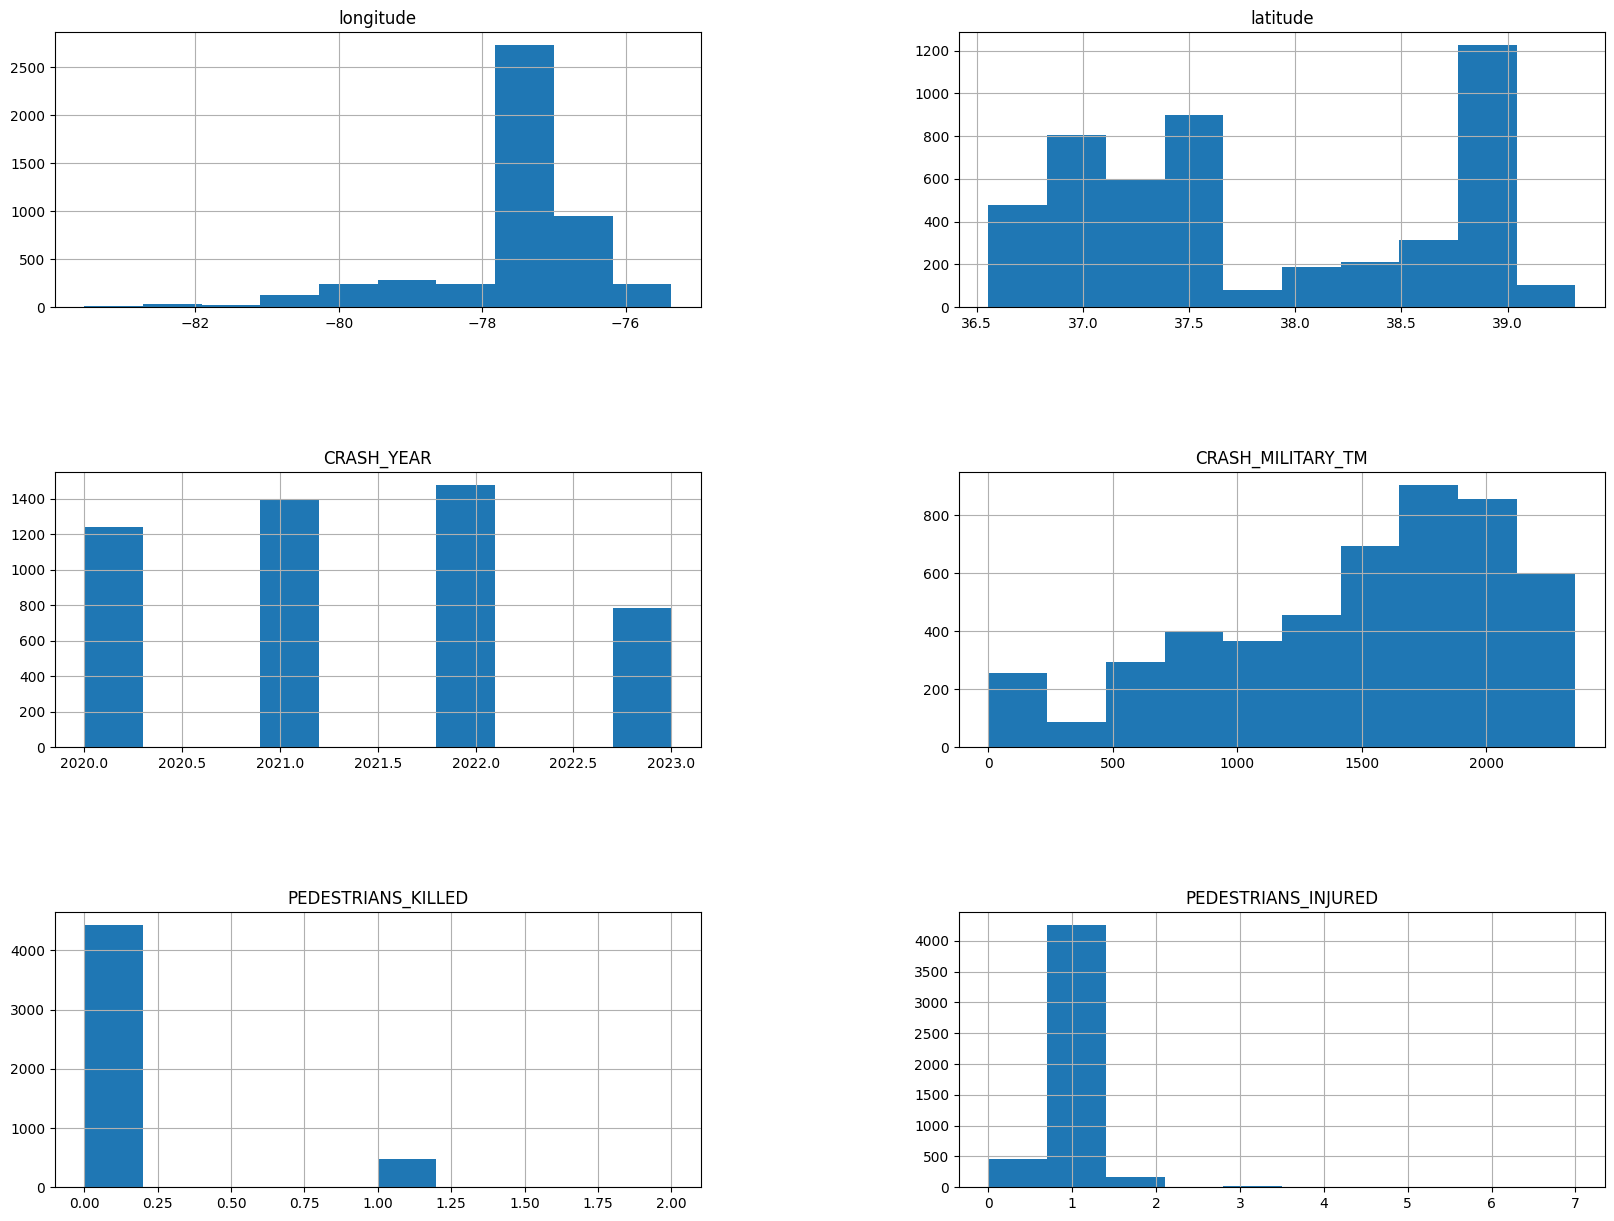

In [8]:
# plotting the features
crash_data.hist(bins = 10, figsize = (20, 15))
plt.subplots_adjust(wspace = 0.4,hspace = 0.6)
plt.show()

In [42]:
from scipy.stats import chi2_contingency
corr_data = crash_data.drop(columns=['longitude', 'latitude', 'CRASH_MILITARY_TM', 'CRASH_YEAR'])
# https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/# used this source to code cramer's
# to create a correlation matrix with categorical and numerical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    minimum_dimension = min(confusion_matrix.shape)-1
    return np.sqrt(phi2 / minimum_dimension)

cramer_matrix = pd.DataFrame(index=corr_data.columns, columns=corr_data.columns)
for i in corr_data.columns:
    for j in corr_data.columns:
        cramer_matrix.loc[i,j] = cramers_v(crash_data[i], crash_data[j])

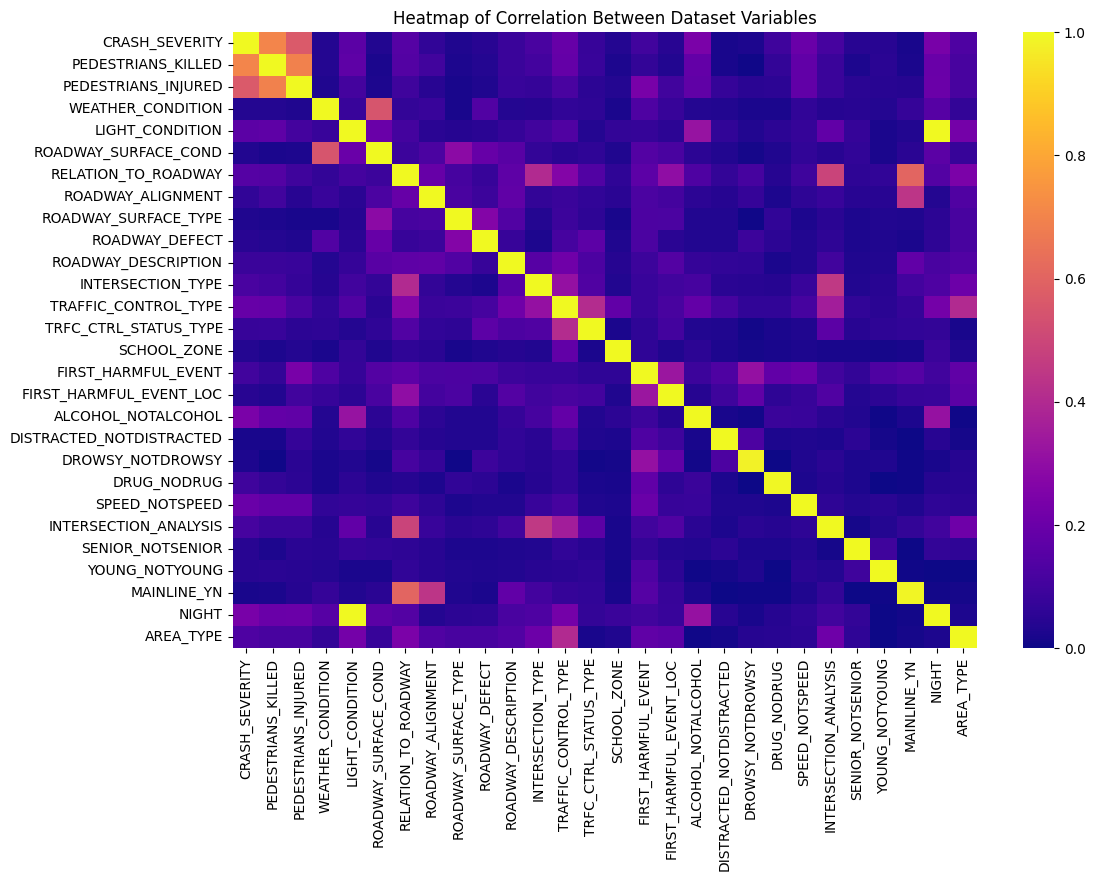

In [43]:
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(cramer_matrix.astype(float), annot=False, cmap="plasma")
plt.title("Heatmap of Correlation Between Dataset Variables")
plt.show()

In [11]:
! pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.0 MB/s eta 0:00:00


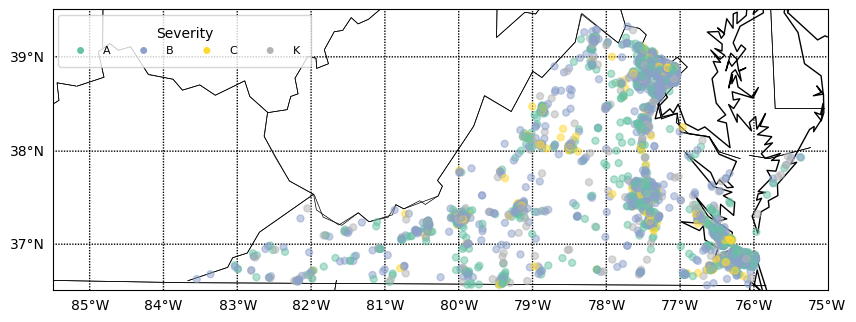

In [78]:
from math import nan
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

longitude = crash_data['longitude'].tolist()
latitude = crash_data['latitude'].tolist()
severities = crash_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
m.drawcoastlines()
m.drawstates()
m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
x, y = m(longitude, latitude)
m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

labels = ["A", "B", "C", "K"]
leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                 handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)

plt.show()

## Data Preparation and Cleaning

In [9]:
# split the data into train set, validation set and test set
from sklearn.model_selection import train_test_split

X = crash_data.drop(columns=["CRASH_SEVERITY", "PEDESTRIANS_KILLED", 'PEDESTRIANS_INJURED'], axis = 1)
y = crash_data["CRASH_SEVERITY"].copy()
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [12]:
# separate into numerical and categorical
crash_num = X_train.select_dtypes(include=[np.number])
crash_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# transformation pipeline for numerical data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01)

my_model = keras.Sequential()

my_model.add(keras.layers.InputLayer(input_shape = 164))
my_model.add(keras.layers.Dense(100, activation="tanh"))
# my_model.add(keras.layers.Dense(100, activation="tanh"))
my_model.add(keras.layers.Dense(4, activation="softmax"))

my_model.compile(loss="categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_encoded = encoder.transform(y_val.to_numpy().reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.to_numpy().reshape(-1, 1))

my_model.fit(X_train_prepared, y_train_encoded, epochs=50, validation_data=(X_val_prepared, y_val_encoded))
results = my_model.evaluate(X_test_prepared, y_test_encoded)
print("Loss on test set: ", results[0])
print("Accuracy on test set: ", results[1])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


111/111 [==============================] - 1s 6ms/step - loss: 1.1250 - accuracy: 0.5074 - val_loss: 1.0268 - val_accuracy: 0.5751
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 1.0439 - accuracy: 0.5553 - val_loss: 1.0261 - val_accuracy: 0.5674
Epoch 3/50
111/111 [==============================] - 0s 4ms/step - loss: 1.0373 - accuracy: 0.5547 - val_loss: 1.0506 - val_accuracy: 0.5191
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 1.0234 - accuracy: 0.5658 - val_loss: 1.0067 - val_accuracy: 0.5649
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 1.0169 - accuracy: 0.5638 - val_loss: 1.0161 - val_accuracy: 0.5827
Epoch 6/50
111/111 [==============================] - 0s 4ms/step - loss: 1.0173 - accuracy: 0.5558 - val_loss: 1.0332 - val_accuracy: 0.5751
Epoch 7/50
111/111 [==============================] - 1s 4ms/step - loss: 1.0077 - accuracy: 0.5711 - val_loss: 1.0138 - val_accuracy: 0.5802
Epoch 8/50
111/11

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train_prepared, y_train)
y_pred = rfc.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5402650356778798


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## K-means Clustering

In [85]:
# prepare data
X = crash_data.drop(columns=['longitude', 'latitude', "CRASH_SEVERITY", "PEDESTRIANS_KILLED", 'PEDESTRIANS_INJURED'], axis = 1)
X_full = crash_data

crash_num = X.select_dtypes(include=[np.number])
crash_cat = X.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

X_prepared = full_pipeline.fit_transform(X)

In [86]:
from sklearn.cluster import KMeans

# create a k_means algorithm with 4 clusters using all of the features
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = kmeans.fit(X_prepared)
X_full["y_pred"] = kmeans.predict(X_prepared)

cluster_percentages = (
    X_full.groupby(['y_pred', 'CRASH_SEVERITY']).size() / X_full.groupby('y_pred').size()
).reset_index(name='percentage')
print(cluster_percentages)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    y_pred CRASH_SEVERITY  percentage
0        0              A    0.325301
1        0              B    0.464142
2        0              C    0.068273
3        0              K    0.142283
4        1              A    0.284879
5        1              B    0.558062
6        1              C    0.101921
7        1              K    0.055138
8        2              A    0.331429
9        2              B    0.375238
10       2              C    0.059048
11       2              K    0.234286
12       3              A    0.231733
13       3              B    0.620042
14       3              C    0.115518
15       3              K    0.032707


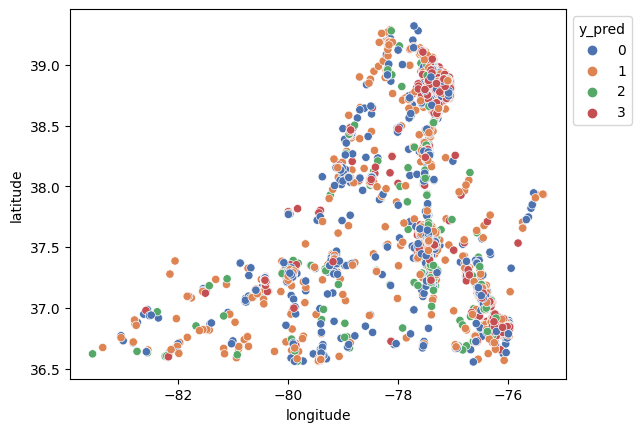

In [88]:
this_plot = sns.scatterplot(data=X_full,x='longitude',y='latitude',hue='y_pred', palette="deep" ) # Plot the fake data
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

### K-Means with Road Condition

> Variable Definitions
- ROADWAY_SURFACE_COND: The roadway surface condition of the travel lanes
- RELATION_TO_ROADWAY: The location of the event in relation to the roadway (ex. acceleration/decceleration lanes)
- ROADWAY_DEFECT: Roadway defects at the scene of the crash that may have contributed to the crash
- ROADWAY_DESCRIPTION: The type of roadway facility at the location of the crash (ex. one way or two way)




In [47]:
X_road = crash_data[['ROADWAY_SURFACE_COND', 'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]
crash_num = X_road.select_dtypes(include=[np.number])

crash_cat = X_road.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


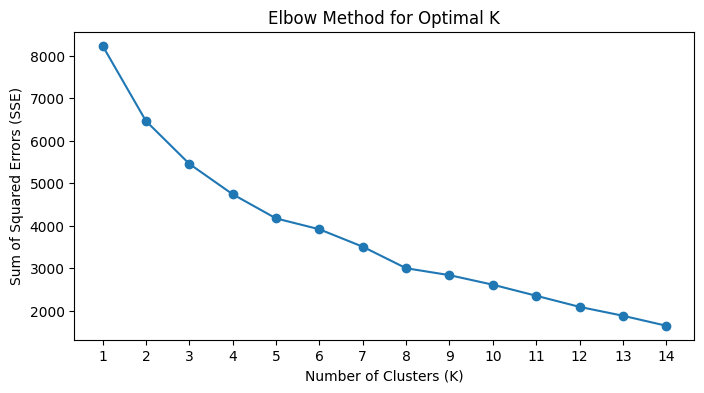

In [48]:
# look at an elbow graph to determine the optimal number of clusters
k_values = range(1, 15)
sse_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_road_prepared)
    sse_values.append(kmeans.inertia_)

# Plot the SSE values against K
plt.figure(figsize=(8, 4))
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()

In [49]:
# cluster by looking at road conditions
X_road_prepared = full_pipeline.fit_transform(X_road)
kmeans = KMeans(n_clusters=8, random_state=42)

# fit the model to the prepared data
kmeans = kmeans.fit(X_road_prepared)

# predict the cluster labels for the test set
X["y_pred"] = kmeans.predict(X_road_prepared)

# print the cluster centers
# print(kmeans.cluster_centers_)
print(kmeans.inertia_)

2999.234996960984


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
X_road = crash_data[['ROADWAY_SURFACE_COND', 'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]
crash_num = X_road.select_dtypes(include=[np.number])
crash_cat = X_road.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

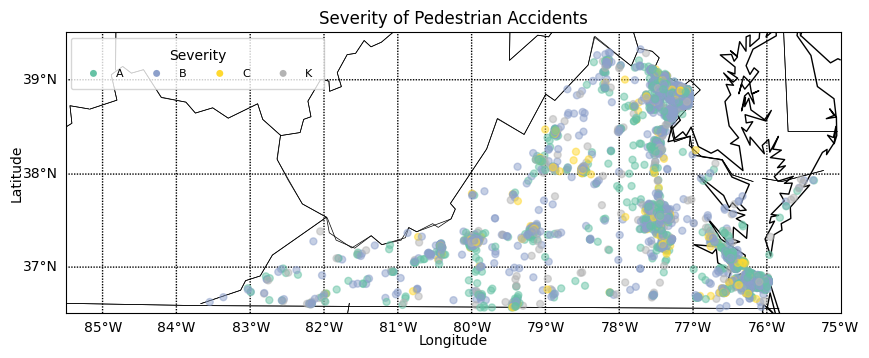

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-51-76beb2a713a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_road_data['Cluster'] = cluster_labels


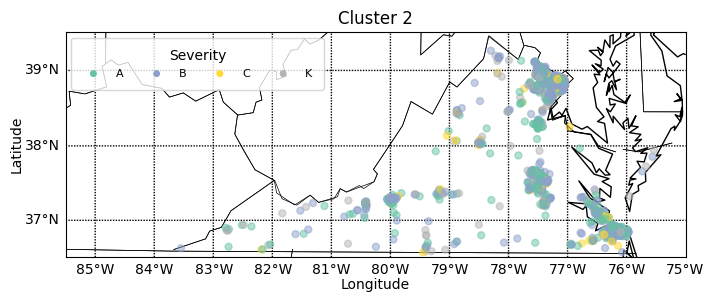

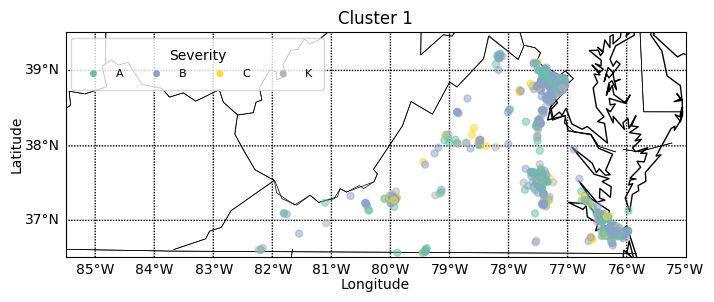

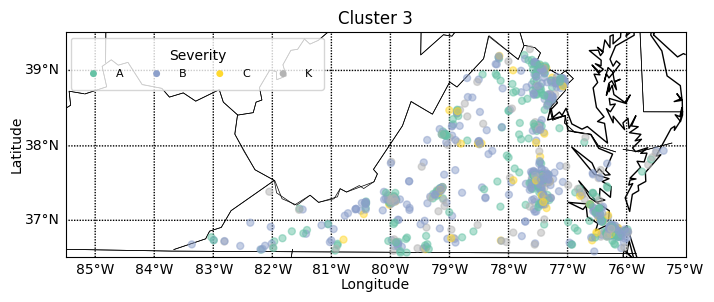

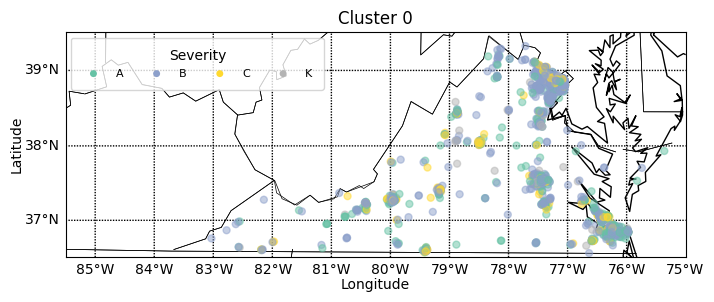

In [51]:
plt.figure(figsize=(10, 6))
severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

longitude = crash_data['longitude'].tolist()
latitude = crash_data['latitude'].tolist()
severities = crash_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
m.drawcoastlines()
m.drawstates()
m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
x, y = m(longitude, latitude)
m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

labels = ["A", "B", "C", "K"]
leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                 handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
plt.title('Severity of Pedestrian Accidents')
plt.xlabel('Longitude', labelpad=15)
plt.ylabel('Latitude', labelpad=30)
plt.show()

X_road_data = crash_data[['longitude', 'latitude', 'CRASH_SEVERITY', 'ROADWAY_SURFACE_COND',
                             'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]

X_road_cluster = full_pipeline.fit_transform(X_road)

# kmeans algorithm with optimal cluster number
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_road_cluster)
X_road_data['Cluster'] = cluster_labels


n_clusters = len(X_road_data['Cluster'].unique())

for cluster in X_road_data['Cluster'].unique():
  cluster_data = X_road_data[X_road_data['Cluster'] == cluster]
  plt.figure(figsize=(8, 4))
  severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

  longitude = cluster_data['longitude'].tolist()
  latitude = cluster_data['latitude'].tolist()
  severities = cluster_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
  m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

  categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
  m.drawcoastlines()
  m.drawstates()
  m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
  m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
  x, y = m(longitude, latitude)
  m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

  l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
  l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
  l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
  l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

  labels = ["A", "B", "C", "K"]
  leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                  handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
  plt.title(f'Cluster {cluster}')
  plt.xlabel('Longitude', labelpad=15)
  plt.ylabel('Latitude', labelpad=30)
  plt.show()

### K-Means with Weather/Road Condition

In [60]:
X_road = crash_data[['ROADWAY_SURFACE_COND', 'WEATHER_CONDITION', 'LIGHT_CONDITION', 'NIGHT', 'SPEED_NOTSPEED', 'TRAFFIC_CONTROL_TYPE', 'ALCOHOL_NOTALCOHOL', 'INTERSECTION_TYPE']]
crash_num = X_road.select_dtypes(include=[np.number])
crash_cat = X_road.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

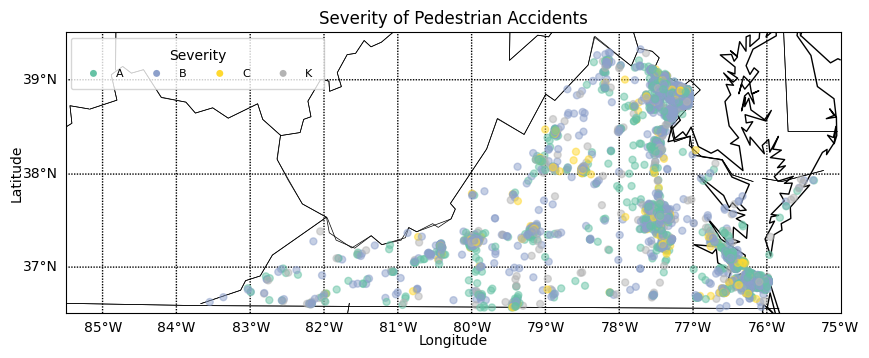

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-62-f627d7f71d43>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_road_data['Cluster'] = cluster_labels


    Cluster CRASH_SEVERITY  percentage
0         0              A    0.330735
1         0              B    0.437082
2         0              C    0.061804
3         0              K    0.170379
4         1              A    0.222222
5         1              B    0.628692
6         1              C    0.114627
7         1              K    0.034459
8         2              A    0.301754
9         2              B    0.487719
10        2              C    0.103509
11        2              K    0.107018
12        3              A    0.298923
13        3              B    0.545781
14        3              C    0.094255
15        3              K    0.061041


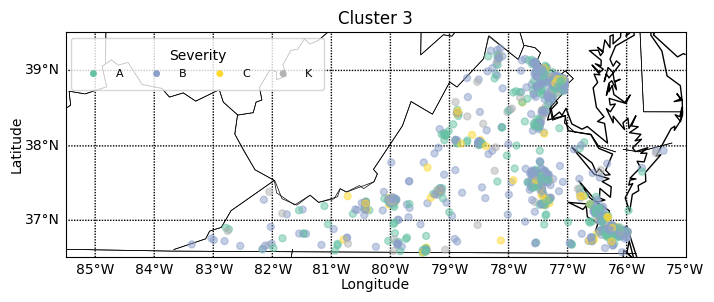

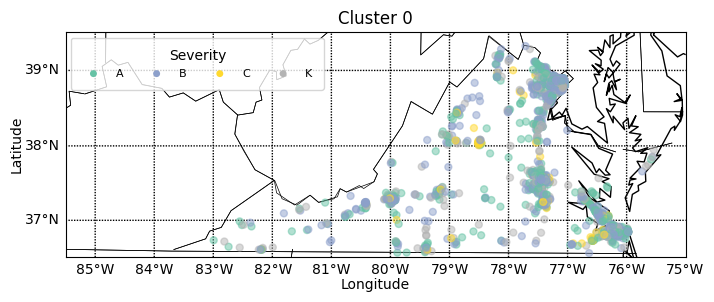

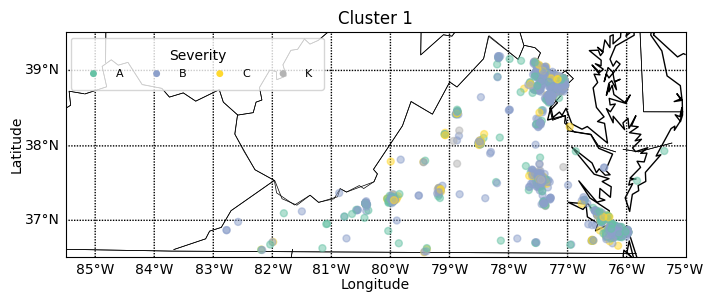

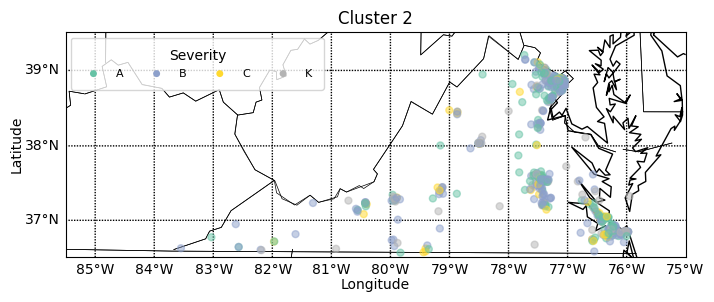

In [62]:
plt.figure(figsize=(10, 6))
severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

longitude = crash_data['longitude'].tolist()
latitude = crash_data['latitude'].tolist()
severities = crash_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
m.drawcoastlines()
m.drawstates()
m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
x, y = m(longitude, latitude)
m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

labels = ["A", "B", "C", "K"]
leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                 handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
plt.title('Severity of Pedestrian Accidents')
plt.xlabel('Longitude', labelpad=15)
plt.ylabel('Latitude', labelpad=30)
plt.show()

X_road_data = crash_data[['longitude', 'latitude', 'CRASH_SEVERITY', 'ROADWAY_SURFACE_COND',
                             'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]

X_road_cluster = full_pipeline.fit_transform(X_road)

# kmeans algorithm with optimal cluster number
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_road_cluster)
X_road_data['Cluster'] = cluster_labels


cluster_percentages = (
    X_road_data.groupby(['Cluster', 'CRASH_SEVERITY']).size() / X_road_data.groupby('Cluster').size()
).reset_index(name='percentage')
print(cluster_percentages)


n_clusters = len(X_road_data['Cluster'].unique())

for cluster in X_road_data['Cluster'].unique():
  cluster_data = X_road_data[X_road_data['Cluster'] == cluster]
  plt.figure(figsize=(8, 4))
  severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

  longitude = cluster_data['longitude'].tolist()
  latitude = cluster_data['latitude'].tolist()
  severities = cluster_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
  m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

  categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
  m.drawcoastlines()
  m.drawstates()
  m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
  m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
  x, y = m(longitude, latitude)
  m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

  l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
  l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
  l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
  l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

  labels = ["A", "B", "C", "K"]
  leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                  handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
  plt.title(f'Cluster {cluster}')
  plt.xlabel('Longitude', labelpad=15)
  plt.ylabel('Latitude', labelpad=30)
  plt.show()